# Sitting Standing position detection

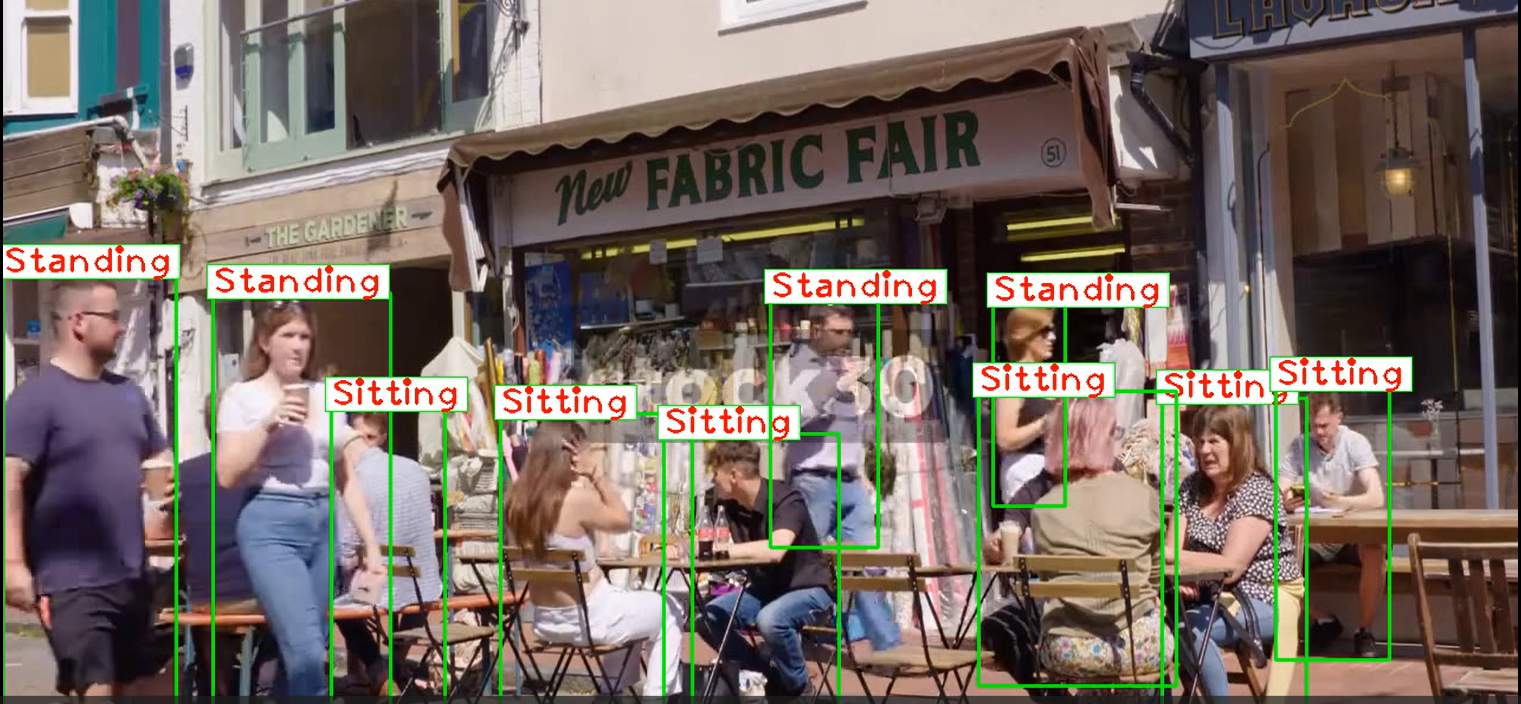

# Importing libraries

In [1]:
import cv2
from ultralytics import YOLO
import numpy as np
import cvzone
import math

# The Model

In [3]:
model = YOLO("yolov8n.pt") 

100%|██████████████████████████████████████████████████████████████████████████████| 6.23M/6.23M [00:25<00:00, 254kB/s]


# Calulate Angle and Ratio Function

In [1]:
def calculate_angle(a, b, c):
    a = np.array(a.cpu())  # First
    b = np.array(b.cpu())  # Mid
    c = np.array(c.cpu())  # End
    
    upper=math.sqrt(((a[1] - b[1])**2)+( (a[0] - b[0])**2))
    thigh=math.sqrt(((c[1] - b[1])**2)+((c[0] - b[0])**2))
    ratio=thigh/upper
    radians = np.arctan2(c[1] - b[1], c[0] - b[0]) - np.arctan2(a[1] - b[1], a[0] - b[0])
    angle = np.abs(radians * 180.0 / np.pi)

    if angle > 180.0:
        angle = 360 - angle

    return angle , ratio

In [14]:
import cv2
video_path = "g.mp4"
cap = cv2.VideoCapture(video_path)
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))
   
size = (frame_width, frame_height)
   
# Below VideoWriter object will create
# a frame of above defined The output 
# is stored in 'filename.avi' file.
result = cv2.VideoWriter('filename416.avi', 
                         cv2.VideoWriter_fourcc(*'MJPG'),
                         20, size)
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model.track(frame)
    ##########new insertation
        # Get the bounding box information in xyxy format
        boxes = results[0].boxes.xyxy.cpu().numpy().astype(int)

        statuses = []

        # Get the keypoints data for all detected persons
        keypoints_data = results[0].keypoints.data

        # Iterate through the detected persons
        for i, keypoints in enumerate(keypoints_data):
            # Ensure keypoints are detected
            if keypoints.shape[0] > 0:
                angle,ratio = calculate_angle(keypoints[11][:2], keypoints[13][:2], keypoints[15][:2])  # Angle between head, hips, and knees
                
                print(f"Person {i + 1} is {'Sitting' if angle is not None and angle < 110 else 'Standing'} (Angle: {angle:.2f} degrees)")
                print(f"angle: {angle}")
                if angle is not None and angle < 140:
                    statuses.append('Sitting')

                elif  ratio <=0.65:
                    statuses.append('Sitting')
                else:
                    statuses.append('Standing')
 
        # Draw bounding boxes and statuses on the frame
        for i in range(len(boxes)):
            x1, y1, x2, y2 = boxes[i]
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cvzone.putTextRect(
                frame, f"{statuses[i]}", (x1, y1 ),  # Image and starting position of the rectangle
                scale=2, thickness=2,  # Font scale and thickness
                colorT=(0, 0, 255), colorR=(255, 255, 255),  # Text color and Rectangle color
                font=cv2.FONT_HERSHEY_PLAIN,  # Font type
                offset=5,  # Offset of text inside the rectangle
                border=0, colorB=(0, 255, 0)  # Border thickness and color
            )
    ###############end of new insertation
        result.write(frame)

        # Display the annotated frame
        annotated_frame = results[0].plot()
        cv2.imshow(" ", frame)


        # Break the loop if 'q' is pressed
        if cv2.waitKey(27) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
result.release()
cv2.destroyAllWindows()


0: 384x640 1 person, 143.1ms
Speed: 12.7ms preprocess, 143.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Standing (Angle: 156.77 degrees)
angle: 156.76549460460117


0: 384x640 1 person, 138.2ms
Speed: 2.0ms preprocess, 138.2ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Standing (Angle: 134.21 degrees)
angle: 134.21214166332737


0: 384x640 1 person, 66.8ms
Speed: 1.0ms preprocess, 66.8ms inference, 0.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Sitting (Angle: 103.59 degrees)
angle: 103.58699410433758


0: 384x640 1 person, 67.6ms
Speed: 1.8ms preprocess, 67.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Sitting (Angle: 80.86 degrees)
angle: 80.86127086670363


0: 384x640 1 person, 67.1ms
Speed: 2.0ms preprocess, 67.1ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Sitting (Angle: 81.23 degrees)
angle: 81.22806932797732


0: 384x640 1 person, 66.6ms
Speed: 3.0ms preprocess, 66.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 person, 66.9ms


Person 1 is Sitting (Angle: 71.62 degrees)
angle: 71.62460478888596


Speed: 2.5ms preprocess, 66.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Sitting (Angle: 87.53 degrees)
angle: 87.529437931691


0: 384x640 1 person, 66.5ms
Speed: 2.0ms preprocess, 66.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Sitting (Angle: 105.23 degrees)
angle: 105.22684056178758


0: 384x640 1 person, 67.6ms
Speed: 1.0ms preprocess, 67.6ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


Person 1 is Standing (Angle: 132.34 degrees)
angle: 132.3397272646384



0: 384x640 1 person, 135.7ms
Speed: 3.0ms preprocess, 135.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Standing (Angle: 149.24 degrees)
angle: 149.23741036557485


0: 384x640 1 person, 71.3ms
Speed: 1.8ms preprocess, 71.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Standing (Angle: 149.75 degrees)
angle: 149.7474888927914


0: 384x640 1 person, 70.5ms
Speed: 1.0ms preprocess, 70.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Standing (Angle: 153.63 degrees)
angle: 153.6255883412546


0: 384x640 1 person, 71.0ms
Speed: 1.0ms preprocess, 71.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Standing (Angle: 145.90 degrees)
angle: 145.90194212591248


0: 384x640 1 person, 70.6ms
Speed: 2.0ms preprocess, 70.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Standing (Angle: 157.03 degrees)
angle: 157.02500081192665


0: 384x640 1 person, 69.9ms
Speed: 2.0ms preprocess, 69.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Standing (Angle: 159.27 degrees)
angle: 159.27117682237702


0: 384x640 1 person, 70.1ms
Speed: 2.0ms preprocess, 70.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Standing (Angle: 174.26 degrees)
angle: 174.26370159774348


0: 384x640 1 person, 70.1ms
Speed: 2.5ms preprocess, 70.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Standing (Angle: 159.57 degrees)
angle: 159.5681261267325


0: 384x640 1 person, 70.1ms
Speed: 2.0ms preprocess, 70.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)



Person 1 is Standing (Angle: 136.15 degrees)
angle: 136.15415568965875


0: 384x640 1 person, 71.1ms
Speed: 3.0ms preprocess, 71.1ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


Person 1 is Sitting (Angle: 100.70 degrees)
angle: 100.70103063186639
